<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_257870150_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 257870150
period = 0.704764613905649  # Orbital period in days
epoch = 2474.22211357492
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.1]
folded_lc = folded_lc[folded_lc.time > -0.1]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_257870150_all_sector_lightcurve.csv


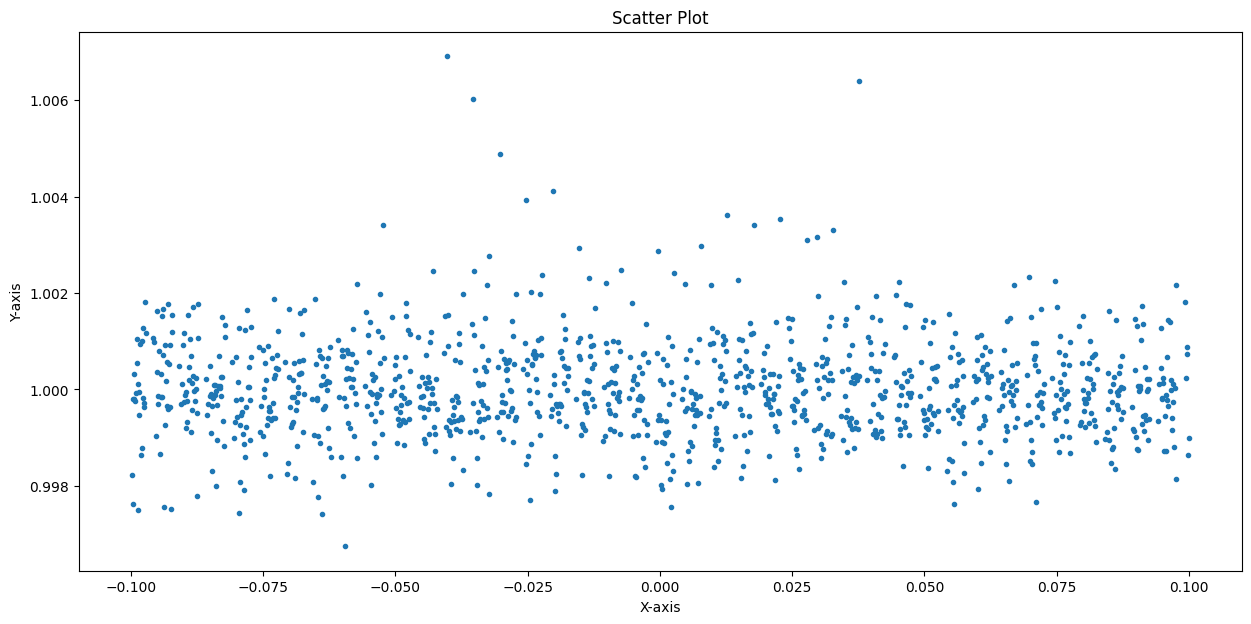

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [80]:
ID = tic_id
sectors = np.array([43])
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

Sector 43


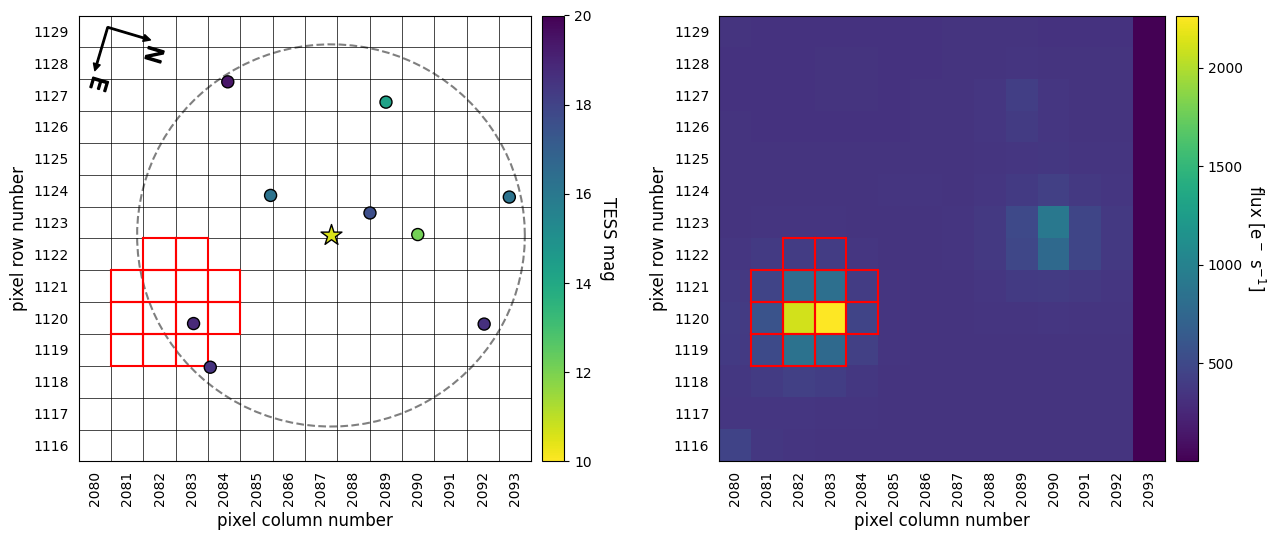

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,257870150,10.5650,8.394,7.883,7.585,43.253714,16.881289,0.094551,0.118649,2790.0,261.015000,0.000,0.000
1,257870152,17.6520,16.417,15.762,15.056,43.247503,16.886858,NaN,NaN,NaN,NaN,29.320,313.137
2,257870146,16.1966,15.211,14.744,14.422,43.249734,16.868728,0.780000,1.186610,4817.0,0.419685,47.255,196.865
3,257870153,12.1133,11.419,11.207,11.103,43.248821,16.896268,NaN,1.384500,6427.4,NaN,56.495,342.641
4,257870151,14.2238,13.082,12.456,12.260,43.226499,16.883793,0.689000,0.665181,4405.0,3.004740,94.183,275.494
5,640254563,18.8358,NaN,NaN,NaN,43.277206,16.862139,0.400000,0.334775,3404.0,1.388920,106.315,130.424
6,640254574,18.6016,NaN,NaN,NaN,43.261463,16.912475,NaN,NaN,3567.0,1.196090,115.399,13.373
7,257885983,18.5492,16.843,16.129,15.895,43.284226,16.867329,NaN,NaN,3986.0,1.365260,116.511,115.549
8,257870156,16.2027,15.087,14.454,14.313,43.237016,16.910144,0.740000,0.686176,4643.0,0.997523,118.738,331.029
9,640254560,19.4400,NaN,NaN,NaN,43.231441,16.855334,NaN,NaN,4279.0,2.571150,120.908,219.397


In [81]:
ap_43 = np.array([[2081.0, 1119.0], [2081.0, 1120.0], [2081.0, 1121.0], [2082.0, 1119.0],
      [2082.0, 1120.0], [2082.0, 1121.0], [2082.0, 1122.0], [2083.0, 1119.0], [2083.0,
        1120.0], [2083.0, 1121.0], [2083.0, 1122.0], [2084.0, 1120.0], [2084.0, 1121.0]])

apertures = np.array([ap_43])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars
# I am a little bit concerned about this apperture, pixel position and the magnitude of the star

In [82]:
target.calc_depths(tdepth=0.331, all_ap_pixels=apertures)
target.stars
# No depth matching

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,257870150,10.5650,8.394,7.883,7.585,43.253714,16.881289,0.094551,0.118649,2790.0,261.015000,0.000,0.000,1.131247e-02,0.000000
1,257870152,17.6520,16.417,15.762,15.056,43.247503,16.886858,NaN,NaN,NaN,NaN,29.320,313.137,8.948142e-10,0.000000
2,257870146,16.1966,15.211,14.744,14.422,43.249734,16.868728,0.780000,1.186610,4817.0,0.419685,47.255,196.865,2.465354e-03,0.000000
3,257870153,12.1133,11.419,11.207,11.103,43.248821,16.896268,NaN,1.384500,6427.4,NaN,56.495,342.641,3.365705e-12,0.000000
4,257870151,14.2238,13.082,12.456,12.260,43.226499,16.883793,0.689000,0.665181,4405.0,3.004740,94.183,275.494,8.659299e-20,0.000000
5,640254563,18.8358,NaN,NaN,NaN,43.277206,16.862139,0.400000,0.334775,3404.0,1.388920,106.315,130.424,7.099291e-01,0.466244
6,640254574,18.6016,NaN,NaN,NaN,43.261463,16.912475,NaN,NaN,3567.0,1.196090,115.399,13.373,2.788451e-24,0.000000
7,257885983,18.5492,16.843,16.129,15.895,43.284226,16.867329,NaN,NaN,3986.0,1.365260,116.511,115.549,2.762931e-01,0.000000
8,257870156,16.2027,15.087,14.454,14.313,43.237016,16.910144,0.740000,0.686176,4643.0,0.997523,118.738,331.029,6.512886e-31,0.000000
9,640254560,19.4400,NaN,NaN,NaN,43.231441,16.855334,NaN,NaN,4279.0,2.571150,120.908,219.397,2.697799e-12,0.000000


In [83]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 640254563.
Calculating EB and EBx2P scenario probabilities for 640254563.
Calculating PTP scenario probability for 640254563.
Calculating PEB and PEBx2P scenario probabilities for 640254563.
Calculating STP scenario probability for 640254563.
Calculating SEB and SEBx2P scenario probabilities for 640254563.
Calculating DTP scenario probability for 640254563.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 640254563.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 640254563.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 640254563.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


CPU times: user 4min 5s, sys: 4.81 s, total: 4min 9s
Wall time: 3min 4s


In [84]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.53106308
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,640254563,TP,0.400000,0.334775,0.704765,82.694734,1.051001,0.584916,225.359374,2.711496,0.000000,0.000000,0.244155
1,640254563,EB,0.400000,0.334775,0.704765,77.541154,1.985335,0.005689,272.804041,0.000000,0.376594,0.334775,0.009901
2,640254563,EBx2P,0.400000,0.334775,1.409529,83.382735,1.981395,0.448662,225.325471,0.000000,0.398239,0.334775,0.031121
3,640254563,PTP,0.400000,0.334775,0.704765,82.221094,1.120003,0.599858,226.142451,4.642337,0.000000,0.000000,0.065119
4,640254563,PEB,0.400000,0.334775,0.704765,77.238675,1.988597,0.007904,343.696047,0.000000,0.334777,0.334775,0.002875
5,640254563,PEBx2P,0.400000,0.334775,1.409529,84.166859,1.464828,0.378048,200.244321,0.000000,0.391305,0.334775,0.009247
6,640254563,STP,0.330329,0.334775,0.704765,81.074920,1.065902,0.412087,204.128638,16.506973,0.000000,0.000000,0.119166
7,640254563,SEB,0.102920,0.124158,0.704765,82.953819,1.673531,0.000051,113.585016,0.000000,0.028384,0.100000,0.001574
8,640254563,SEBx2P,0.397360,0.334775,1.409529,84.182628,1.438349,0.374411,198.495863,0.000000,0.382215,0.334775,0.007765
9,640254563,DTP,0.400000,0.334775,0.704765,82.976896,0.974960,0.586375,222.534020,2.786166,0.000000,0.000000,0.159662


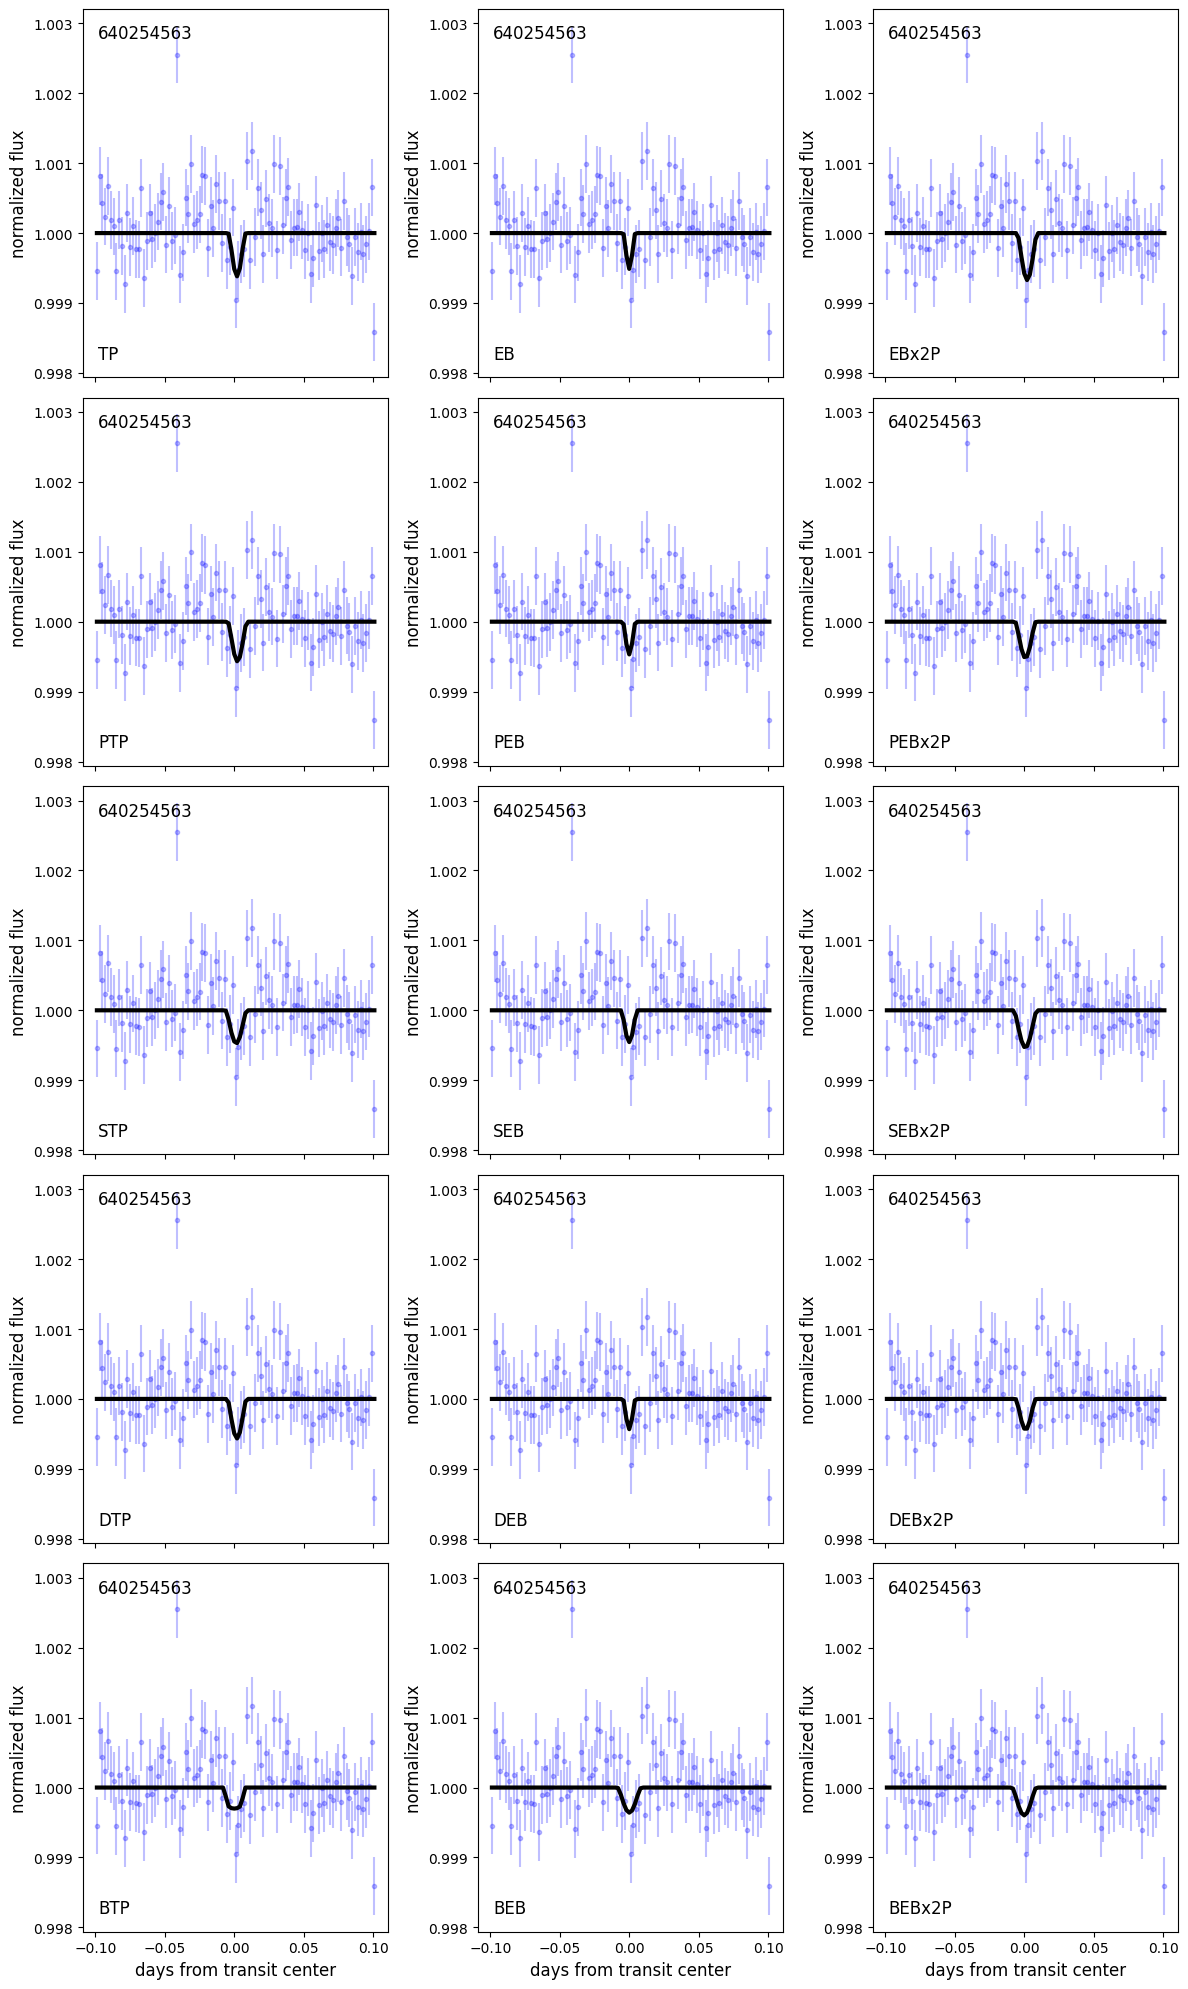

In [85]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [86]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_me

FPP = 0.5325881327258487 +/- 0.001220612068473262
NFPP = 0.0 +/- 0.0
CPU times: user 1h 20min 58s, sys: 1min 24s, total: 1h 22min 23s
Wall time: 56min 21s


Our final conclusion about this specified planet of TIC 257870150 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).